In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

# Modeling a wrapped normal
This notebook demonstrates how to use `scipy.stats.vonmises` to model a wrapped gausian distribution.

### References
[scipy.stats.vonmises](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.vonmises.html)

[Python & Scipy: How to fit a von mises distribution?](https://stackoverflow.com/questions/39020222/python-scipy-how-to-fit-a-von-mises-distribution)

## Generate samples from a unit normal

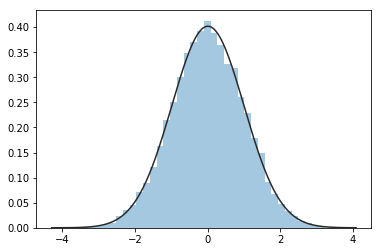

In [9]:
samples = stats.norm.rvs(size=10000)
sns.distplot(samples, bins=40, kde=False, fit=stats.norm)
plt.show()

## Wrap the samples
We select an arbitrary cutoff point at `x=1`. We take the samples to the right of that point and move them to the left and take the samples to the left and shift them to the right. This gives us a new set of samples which is very poorly modeled by a gaussian.

In [10]:
def wrap_samples(samples, cut):
    left, right = samples[samples < cut], samples[samples >= cut]
    lshift, rshift = (right.max() - right.min()), (left.max() - left.min())
    left, right = left + lshift, right - rshift
    samples = np.concatenate([right, left])
    return samples

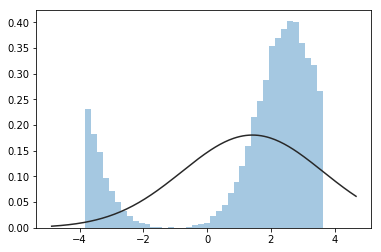

In [11]:
samples = wrap_samples(samples, cut=1.)
sns.distplot(samples, bins=40, kde=False, fit=stats.norm)
plt.show()

### Model using vonmises
The vonmises distribution lets us model a wrapped gaussian distribution. We only need to provide the `scale` parameter which describes how to map between our sample space and radian space (0 to 2pi).

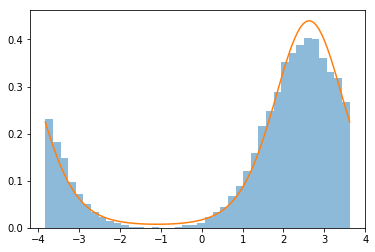

In [12]:
scale = (samples.max() - samples.min()) / (2 * np.pi)
kappa, loc, scale = stats.vonmises.fit(samples, fscale=scale)
model = stats.vonmises(kappa=kappa, loc=loc, scale=scale)
x = np.linspace(samples.min(), samples.max(), 100)
y = model.pdf(x)
plt.hist(samples, bins=40, density=True, alpha=.5)
plt.plot(x, y)
plt.show()